# PC 4 : Méthodes directes pour la résolution de systèmes linéaires

**<big> Préparation avant la PC :</big>** 
**Les questions 1 et 2 de l'exercice 1 sont à préparer** avant la séance. 

In [4]:
# Ce package permet de travailler efficacement avec des tableaux
import numpy as np
# Ce package propose de fonctions d'aglebre lineaire (inverse, determinant...)
import numpy.linalg as lin
# Ces fonctions sont utilisees comme reference pour la decomposition LU
from scipy.linalg import lu_factor, lu_solve, solve_banded

# Ce package permet de faire des sorties graphiques
from matplotlib import pyplot as plt

# Cette fonction permet de comparer des temps d'execution
from time import time

>**Rappels et notations :**
>
>- Étant donnée une norme $\left\Vert \cdot \right\Vert$ sur $\mathbb K^n$ ($\mathbb{K}=\mathbb{R}$ ou $\mathbb{C}$), on définit la norme subordonnée associée sur $M_n(\mathbb{K})$ par
>
>$$\left\Vert A \right\Vert = \sup_{\substack{x\in\mathbb{K}^n \\ x\neq 0}} \frac{\left\Vert Ax \right\Vert}{\left\Vert x \right\Vert} = \max_{\substack{x\in\mathbb{K}^n \\ \left\Vert x \right\Vert= 1}}\left\Vert Ax \right\Vert.$$
>
>- Une norme $\left\Vert \cdot \right\Vert$ sur $M_n(\mathbb K)$ ($\mathbb K = \mathbb R$ ou $\mathbb C$) est dite matricielle (ou d'algèbre) si 
>
>$$\forall A,B \in M_n(\mathbb K),\quad{} \left\Vert AB\right\Vert \leq \left\Vert A\right\Vert \left\Vert B\right\Vert.$$
>
>- Les normes subordonnées sont des normes matricielles. Il existe des normes matricielles qui ne sont pas des normes subordonnées, par exemple la norme de Frobenius : $\left\Vert A\right\Vert_F = \sqrt{\mathrm{tr}(A^{*}A)}$.
>
>- Pour tout matrice $A\in M_n(\mathbb{K})$ inversible, on définit son conditionnement, associé à une norme subordonnée $\left\Vert \cdot \right\Vert$, par
>
>$$\kappa(A) = \Vert A \Vert \Vert A^{-1} \Vert.$$
>
>- Soit $A\in M_n(\mathbb{K})$, on appelle rayon spectral de $A$ la quantité
>
>$$\rho(A)=\max\limits_{\lambda\in \mathrm{Sp}(A)} \vert\lambda\vert.$$
>
>- Si $A$ est une matrice normale (c'est à dire telle que $A^*A=AA^*$), $\left\Vert A \right\Vert_2 = \rho(A)$.

---

## Exercice 1 : Conditionnement

### Question 1 : Conditionnement local par rapport au second membre

>Soit $A$ est une matrice réelle inversible de taille $n \times n$. Pour un vecteur $b \in \mathbb{R}^n$ on cherche à résoudre le système
>
>$$ Ax=b, $$
>
>et on note $\mathcal{P}(b)=A^{-1}b$ avec $A$ fixée. On étudie la variabilité de la solution $x$ par rapport aux erreurs sur le terme $b$ à droite du système. Pour cela, on définit le *conditionnement local* associé au problème $\mathcal{P}$ pour tout $b \in \mathbb{R}^n\setminus\{0\}$ par
>
>$$\kappa_b(A) = \frac{1}{\varepsilon} \sup_{\frac{\left\Vert \delta b \right\Vert}{\left\Vert b \right\Vert}\leq \varepsilon} \frac{\left\Vert \mathcal{P}(b+\delta b) - \mathcal{P}(b) \right\Vert}{\left\Vert \mathcal{P}(b) \right\Vert}.$$

$1$. Comparer $\kappa_b(A)$ et $\kappa(A)$.

$$\kappa_b(A) = \frac{1}{\varepsilon} \sup_{\frac{\left\Vert \delta b \right\Vert}{\left\Vert b \right\Vert}\leq \varepsilon} \frac{\left\Vert A^{-1}(\cancel{b} + \delta b) - \cancel{A^{-1}b} \right\Vert}{\left\Vert A^{-1}b \right\Vert} = \frac{1}{\varepsilon \| A^{-1}b} \| \sup_{\left\Vert \delta b \right\Vert \leq \varepsilon\left\Vert b \right\Vert}  \left\Vert A^{-1}\delta b  \right\Vert \cdot \frac{\| b \|}{ \| b \|} \cdot \frac{\| \delta b \|}{\| \delta b \|}  = \frac{1}{\| A^{-1}b \|} \sup_{\left\Vert \delta b \right\Vert = 1}  \left\Vert A^{-1}\delta b  \right\Vert \| b\| = \frac{\| b \|}{\| A^{-1}b \|}  \sup_{\left\Vert \delta b \right\Vert = 1}  \left\Vert A^{-1}\delta b  \right\Vert $$

$$\kappa_b(A) = \frac{\| b \|}{\| A^{-1}b \|}  \| A^{-1} \| = \frac{\| AA^{-1} b \|}{\| A^{-1}b \|}  \| A^{-1} \| \leq \frac{\| A \| \| A^{-1} b \|}{\| A^{-1}b \|}  \| A^{-1} \| = \|A \| \| A^{-1} \| = \kappa(A) $$

$2$.  Montrer qu'il existe $b_1 \in \mathbb{R}^n\setminus\{0\}$ tel que $\kappa_{b_1}(A) = \kappa(A)$, et $b_2 \in \mathbb{R}^n\setminus\{0\}$ tel que $\kappa_{b_2}(A) = 1$.

$$ \exists b \text{ t.q } \frac{\| A^{-1}b \|}{\| b \|} = \| A^{-1}\| \rightarrow \kappa_b = 1 $$

$$ \exists b \text{ t.q } \frac{\| Ab\|}{\| b \|} = \| A\| \rightarrow \hat{b} = Ab \rightarrow \kappa_{\hat{b}} (A) = \frac{\| Ab \|}{\| b \|} \|A^{1} \| = \kappa(A) $$

$3$. Montrer que, pour tout $b \in \mathbb{R}^n\setminus\{0\}$ et tout $\delta b \in \mathbb{R}^n\setminus\{0\}$, si

$$ Ax=b \qquad{}\text{et}\qquad{} A(x+\delta x)=b+\delta b, $$

alors

$$ \frac{\left\Vert \delta x \right\Vert}{\left\Vert x \right\Vert} \leq \kappa_b(A) \frac{\left\Vert \delta b \right\Vert}{\left\Vert b \right\Vert} \leq \kappa(A) \frac{\left\Vert \delta b \right\Vert}{\left\Vert b \right\Vert}. $$

$$\delta x = x + \delta x - x = A^{-1} (b + \delta b) - A^{-1}b = A^{-1} \delta b$$

$$\frac{\| \delta x \|}{ \| x \|} = \frac{\| A^{-1}\delta b \|}{ \| A^{-1} b \|} \frac{\|b \|}{\| \delta b \| } \frac{\| \delta b \|}{\| b \|} \leq \| A^{-1} \| \frac{b}{A^{-1}b} \frac{\| \delta b \|}{\| b \|} = \kappa_b \frac{\| \delta b \|}{\| b \|}$$

### Question 2 : Conditionnement par rapport à la matrice et au second membre

>On étudie dans un premier temps la variabilité de la solution $x$ par rapport aux erreurs sur la matrice $A$ seule. 

$1$. Montrer que pour tout $\delta A$ telle que $\|\delta A\| < \frac{1}{\|A^{-1}\|}$ alors $A+\delta A$ est inversible. Et montrer que 

$$\|(A+\delta A)^{-1}\| \le \frac{\|A^{-1}\|}{1-\|A^{-1}\|\|\delta A\|}.$$

$2$. Montrer que pour tout $\delta A$ et $\delta x$ satisfaisant

$$ (A+\delta A) (x+\delta x) = b,$$

alors on a l'estimation 

$$ \frac{\|\delta x\|}{\|x + \delta x\|} \le \kappa \frac{\|\delta A\|}{\|A\|}. $$

1. $A(Id + A^{-1} \delta A) \Rightarrow (Id + A^{-1}\delta A)^{-1} = \sum \limits ^{+ \infty} _{k=0} (-1)^k (A^{-1} \delta A)^k$
   
   Converge car $\| A^{-1} \delta A \| \leq \| A^{-1} \| \| \delta A \| < 1$

   $\| (Id + A^{-1}\delta A) V \| = 0$

   $\| (Id + A^{-1}\delta A) V \| = \| V + A^{-1} \delta A V \| \geq (1 - \| A^{-1} \delta A\| ) \| V \| \geq (1 - \|A^{-1} \| \| \delta A \| ) \|V\|$

   $\| (A + \delta A)^-1 \| \leq \| A^{-1} \| \| (Id + A^{-1} \delta A )^{-1}\|$

   $\| (Id + A^{-1}\delta A)^{-1} \|  = \sup_V \frac{\| (Id + A^{-1} \delta A)V \|}{\| V \|} = \sup_W \frac{\|W\|}{\|(Id + A^{-1}\delta A)W\|} \leq \frac{1}{1 - \|A^{-1} \| \| \delta A\|}$

   $\therefore \| (A+ \delta A)^{-1} \| \leq \frac{\|A^{-1}\|}{1 - \| A ^{-1} \| \| \delta A \|}$

2. $\frac{\| \delta x \|}{\| x \|} = \frac{\| \mathcal{P}(A + \delta A) - \mathcal{P}(A) \|}{\| \mathcal{P}(A) \|} \rightarrow \frac{\| \delta x \|}{\| x + \delta x \|} = \frac{\| \mathcal{P}(A + \delta A) - \mathcal{P}(A) \|}{\| \mathcal{P}(A + \delta A) \|}$
   
   $\delta x = - A^{-1}\delta A (x + \delta x)$

   car $(A + \delta A)(x + \delta x) = b = A(x + \delta x) + \delta A (x + \delta x)$, $Ax = b = A(x +\delta x ) - A\delta x$

   $\| \delta x \| \leq \| A^{-1} \| \| \delta A \| \| x + \delta x \|$

   $\frac{\| \delta x \|}{\| x + \delta x \|} \leq \kappa \frac{\| \delta A\|}{\| A \|}$

> On étudie finalement la variabilité de la solution $x$ par rapport aux erreurs sur la matrice $A$ et sur le second membre $b$ ensemble. 

$3$. On écrit désormais 

$$ (A+\delta A) (x+\delta x) = b+\delta b.$$ 

Montrer que pour tout $\delta A$ telle que $\|\delta A\| < \frac{1}{\|A^{-1}\|}$, on a 

$$\frac{\|\delta x\|}{\| x \|} \le \frac{\kappa}{1-\|A^{-1}\|\|\delta A\|} \left(\frac{\|\delta A\|}{\|A\|} + \frac{\|\delta b\|}{\|b\|}\right).$$

$(A + \delta A)(x +\delta x) = b + \delta b$, $Ax = b$

$x + \delta x = (Id + A^{-1}\delta A)^{-1}A ^{-1} (\delta b + Ax)$

$\delta x = (Id + A^{-1}\delta A)^{-1} A^{-1} (\delta b + \cancel{Ax} - A(\cancel{Id} + A^{-1} \delta A) x) = (Id + A^{-1}\delta A)^{-1} A^{-1} (\delta b - \delta Ax)$

$\frac{\|\delta x \|}{\| x \|} \leq \frac{\| A^{-1} \|}{1 - \| A^{-1} \| \| \delta A \|}(\| \delta b \| + \| \delta A x \|) \frac{1}{\| x \|} \leq \frac{K}{1 - \| A^{-1}\| \| \delta A\|}(\| \delta b \| + \| \delta Ax \|) \frac{1}{\|A \| \|x \|}$

$\frac{\| \delta A x \|}{\| x \| \| A \|} \leq \frac{\| \delta A \|}{\| A \|}$

$\frac{\| \delta b \|}{\| x \| \| A \|} \leq \frac{\| \delta b \|}{\| Ax \|} = \frac{\| \delta b \|}{\| b \|}$

$4$. On revient sur les systèmes $Ax = b$ de la PC1 avec

- a) $A = \left( \begin{array}{cc} 1+\alpha & -1 \\ 1 & -1 \end{array}\right)$ et $b = \left(\begin{array}{c} \alpha \\ 0 \end{array}\right)$, 
- b) $A = \left( \begin{array}{cc}   \alpha &  1 \\ 1 &  1 \end{array}\right)$ et $b = \left(\begin{array}{c} 1 \\ 2 \end{array}\right)$.

Donner une estimation de $\frac{\|\delta x\|_\infty}{\|x\|_\infty}$ dans chaque cas en fonction de $\alpha$ et évaluer pour $\alpha = 2^{-52}$. 

### Question 3

Montrez que si $A$ est une matrice symétrique réelle alors
  
$$ \kappa_2(A) = \frac{\max\limits_{\lambda\in Sp(A)} \vert\lambda\vert}{\min\limits_{\lambda\in Sp(A)} \vert\lambda\vert}, $$

où $\kappa_2$ désigne le conditionnement pour la norme $\left\Vert \cdot \right\Vert_2$.

*Indication :* On pourra utiliser le fait que $A$ est diagonalisable dans une base orthonormée. 

$ A = QDQ^{T}$

$x = \sum\limits_i b_i e_i$

$Ax = \sum\limits_i b_i \lambda_i e_i \rightarrow e_i \perp e_j$

$\|Ax\|_2^2 = \sum\limits_i b_i^2\lambda_i ^2 \leq \max_j |\lambda_j|^2 \sum\limits_i b_i ^2 = \max|\lambda_j| \|x\|^2_2$

$\| A \| \leq \max_j |\lambda _j |$ et $\| A e_i \|_2 = \max_j |\lambda_j | \| e_j \|_2$

$A^{-1}x = \sum\limits_i \frac{b_i}{\lambda_i}e_i$

$\|A\|_2 = \max |\lambda_j|$

### Question 4

Considérons l'exemple suivant (attribué à H. Rutishauser [1]) : 
    
$$
    A=\begin{pmatrix}
      10 & 1 & 4 & 0 \\
      1  & 10& 5 & -1\\
      4 & 5 & 10 & 7 \\
      0 & -1 & 7 & 9
    \end{pmatrix}
    \text{ avec } 
    b_1 = \begin{pmatrix}
    15\\15\\26\\15
    \end{pmatrix}
    \text{ et }
    b_2 = \begin{pmatrix}
    16\\16\\25\\16
    \end{pmatrix}
$$

In [47]:
# definition de la matrice
A = np.array([[10.,  1.,  4.,  0.],
              [ 1., 10.,  5., -1.],
              [ 4.,  5., 10.,  7.],
              [ 0., -1.,  7.,  9.]])

# defition des vecteurs
b1 = np.array([15.,  15.,  26.,  15.])
b2 = np.array([16.,  16.,  25.,  16.])

$1$. **<font color=black><span style="background-color:skyblue"> À rendre :</span></font>** Calculer le déterminant de $A$ et l'inverse de $A$ avec les fonctions *numpy.linalg.det* et *numpy.linalg.inv*.

In [48]:
print(f"Déterminant via det : {lin.det(A)}")

inv_A = lin.inv(A)

print(f"Inverse     via inv :\n{inv_A}")

Déterminant via det : 1.0000000000003961
Inverse     via inv :
[[ 105.  167. -304.  255.]
 [ 167.  266. -484.  406.]
 [-304. -484.  881. -739.]
 [ 255.  406. -739.  620.]]


$2$. **<font color=black><span style="background-color:skyblue"> À rendre :</span></font>** Résoudre les systèmes $Ax_1=b_1$ et $Ax_2 = b_2$ en utilisant soit l'inverse trouvée ci-dessus, soit *numpy.linalg.solve*. Calculer l'erreur relative $\frac{\|x_1-x_2\|}{\|x_1\|}$ et commenter cette valeur. En déduire une borne inférieure sur le conditionnement (en norme 2).

In [49]:
x2 = lin.solve(A, b2)
x1 = lin.solve(A, b1)

relative_error = np.linalg.vector_norm(x1 - x2, ord=2)/lin.vector_norm(x1, ord=2)

print(f"Erreur relative sur x : {relative_error}")
print(f"borne inf du conditionnement : {relative_error*lin.vector_norm(b1)/lin.vector_norm(b1 - b2)}")

Erreur relative sur x : 1754.9753559523897
borne inf du conditionnement : 32252.8948836391


**Réponse :** 

$3$. **<font color=black><span style="background-color:skyblue"> À rendre :</span></font>** Calculer le conditionnement (en norme 2) de $A$ **par les deux** méthodes suivantes :
- calculer les valeurs propres de $A$ avec *numpy.linalg.eig* et en utilisant la question 2,
- utiliser *numpy.linalg.cond*.

In [50]:
eigen_values = lin.eigvals(A)

eigen_max = np.max(np.abs(eigen_values))
eigen_min = np.min(np.abs(eigen_values))

print(f"Conditionnement via eig  : {eigen_max/eigen_min}")
print(f"Conditionnement via cond : {lin.cond(A)}")

Conditionnement via eig  : 35792.39762891995
Conditionnement via cond : 35792.39762881384


$4$. **<font color=black><span style="background-color:skyblue"> À rendre :</span></font>** Trouver un vecteur $b$ tel que, pour toute perturbation $\delta b$, on ait 

$$\frac{\left\Vert \delta x \right\Vert_2}{\left\Vert x \right\Vert_2} \leq  \frac{\left\Vert \delta b \right\Vert_2}{\left\Vert b \right\Vert_2}.$$

*Justifiez votre réponse de manière théorique. On vérifiera ensuite numériquement que l'inégalité est vérifiée au moins pour 4 vecteurs de perturbation $\delta b$ linéairement indépendant.*

**Réponse :** 

On a $x = A^{-1} b$ et $\delta x = A^{-1} \delta b$. Alors, pour que la expréssion soit vraie:

$$\frac{\left\Vert A^{-1}\delta b \right\Vert_2}{\left\Vert A^{-1}b \right\Vert_2} = \frac{\left\Vert \delta x \right\Vert_2}{\left\Vert x \right\Vert_2} \leq  \frac{\left\Vert \delta b \right\Vert_2}{\left\Vert b \right\Vert_2}$$

On rearrange:

$$\frac{\left\Vert A^{-1}\delta b \right\Vert_2}{\left\Vert \delta b \right\Vert_2} \leq  \frac{\left\Vert A^{-1}b \right\Vert_2}{\left\Vert b \right\Vert_2}$$

Alors, on cherche $b$ tel que:

$$\sup\limits_{b} \frac{\left\Vert A^{-1}b \right\Vert_2}{\left\Vert b \right\Vert_2} $$

Donc, $b$ est la vecteur propre de $A^{-1}$ dont la valeur propre est maximale en module.

In [51]:
eigenvalues, eigenvectors = lin.eig(inv_A)

max_eigen = 0
b = None

for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors.T):
    if np.abs(eigenvalue) > np.abs(max_eigen):
        b = eigenvector
        max_eigen = eigenvalue

x = max_eigen*b

delta_b = np.random.random(size=b.size)
delta_x = inv_A*delta_b

print(f"vecteur considéré : {b}")
print(f"Erreur relative sur x : {100*lin.vector_norm(delta_x)/lin.vector_norm(x):.2f}%")
print(f"Erreur relative sur b : {100*lin.vector_norm(delta_b)/lin.vector_norm(b):.2f}%")

for _ in range(1000):
    delta_b = np.random.random(size=b.size)
    delta_x = inv_A*delta_b

    assert lin.vector_norm(delta_x)/lin.vector_norm(x) <= lin.vector_norm(delta_b)/lin.vector_norm(b)

vecteur considéré : [ 0.23674149  0.37692363 -0.68605301  0.57551135]
Erreur relative sur x : 57.57%
Erreur relative sur b : 146.30%


### Question 5 :

1) On rappelle que le polynôme d'interpolation aux points de Tchebychev dans la base polynomiale de Tchebychev s'écrit 

$$ p_n(f) = \sum\limits_{i=0}^n c_i T_i, \qquad{} \text{avec}\qquad{} c_0 = \frac{1}{n+1}\sum_{i=0}^n T_0(x_i) y_i, \qquad{} c_j = \frac{2}{n+1}\sum_{i=0}^n T_j(x_i) y_i \quad{}\forall j= 1, \dots, n. $$

En écrivant $M$ la matrice telle que $M c = y$ où $c$ est le vecteur de coefficient dans la base de Tchebychev et $y$ est le vecteur des ordonnées telles que $p_n(f)(x_i) = y_i$, montrer que le conditionnement en norme 2 de $M$ vaut  $\sqrt{2}$.

2) a) Calculer numériquement le conditionnement en norme 2 de cette matrice $M$ pour un nombre de points $n = 2^1, 2^2, \dots, 2^8$. 

*Indication :* On pourra utiliser la fonction numpy.linalg.cond de numpy.

b) On cherche maintenant les coefficients du polynôme d'interpolation aux points équidistants dans la base des polynômes de Tchebychev. On écrit donc 

$$ p_n(f) = \sum\limits_{i=0}^n c_i T_i, $$

tel que $p_n(f)(x_i) = y_i = \sum\limits_{j=1}^n L_{i,j} c_j$.

- Calculer numériquement le conditionnement de la matrice $L$ pour un nombre de points $n = 2^1, 2^2, \dots, 2^8$. 
- Tracer ce conditionnement $cond(L)$ en fonction du nombre de points $n$ en échelle log-log.
- Comparer les conditionnements de ces deux méthodes et interpréter en lien avec le chapitre 2.

*Indication :* On pourra utiliser les fonctions cos et arccos de numpy pour calculer les $L_{i,j}$ et la fonction cond pour le conditionnement.

In [62]:
# a)
N      = 8


# print("Conditionnement des matrices M :\n", cond_M)

In [63]:
# b)
N      = 8

# print("Conditionnement des matrices L :\n", cond_L)

In [64]:
# plt.figure()
# plt.scatter(list_n, cond_L, label="cond")
# plt.yscale("log")
# plt.xscale("log")
# plt.legend()
# plt.show()

**Réponse :**



---

## Exercice 2 : Décomposition $QR$ et résolution de systèmes surdimensionnés
>On considère dans cet exercice une matrice réelle $A$ de taille $m\times n$, $m>n$, un vecteur $b\in\mathbb{R}^m$, et on cherche à "résoudre" le système
>
>$$ Ax=b,\quad{} x\in\mathbb{R}^n. $$
>
>En pratique, un tel système n'a souvent pas de solution, et on cherche donc plutôt un $x$ qui minimise l'erreur :
>
>$$ \left\Vert Ax-b \right\Vert_2 = \min_{y\in\mathbb{R}^n} \left\Vert Ay-b \right\Vert_2. \qquad{} (1)$$
>
>On va pour cela utiliser une décomposition $QR$ de $A$, c'est à dire deux matrices $Q$ et $R$, respectivement orthogonale de taille $m\times m$ et triangulaire de taille $m\times n$, telles que $A=QR$.

### Question 1 

On rappelle que si $Q$ est une matrice orthogonale, $Q^T Q=I$ et $\left\Vert Qy \right\Vert_2 = \left\Vert y \right\Vert_2$ pour tout vecteur $y$. En déduire une manière de trouver un vecteur $x$ satisfaisant (1) à l'aide de la factorisation $QR$ et la résolution d'un système triangulaire.

$\| Ax - b \|_2 = \| QRx - B \|_2 = \| Q(Rx - Q^T b) \|_2 = \| Rx - Q^T b\|_2 = \left\| \left( \begin{array}{cc} \widetilde{R}x & -\widetilde{Q^Tb} \\ 0 & -\overline{Q^Tb} \end{array}\right) \right \|_2$

$min = \left\| \left ( \begin{array}{c} 0 \\ \overline{Q^Tb} \end{array} \right ) \right \|_2$ obtenu en $x = \widetilde{R}^{-1} \widetilde{Q^Tb}$

### Question 2 

**<font color=black><span style="background-color:skyblue"> À rendre :</span></font>** Utiliser cette méthode pour résoudre le système surdimensionné $Bx=b$, avec 

$$
    B=\begin{pmatrix}
      10 & 1 & 4  \\
      1  & 3 & 5 \\
      4 & 5  & 10 \\
      2 & 5  & 6 \\
      1 & 8  & 6 \\
      5 & 9  & -4 \\
      0 & -1 & 7 
    \end{pmatrix}\quad{} 
    \text{ et }\quad{}
    b = \begin{pmatrix}
    14\\15\\26\\28\\47\\70 \\-15
    \end{pmatrix}
$$
et vérifier la valeur de la norme $\|A y - b\|$ pour $y = x + e_i$ où $e_i = (1,0,0)^T$, $(0,1,0)^T$ et $(0,0,1)^T$.    

*Indication :* Utiliser la fonction *numpy.linalg.qr.*

In [67]:
B = np.array([[10,1,4],[1,3,5],[4,5,10],[2,5,6],[1,8,6],[5,9,-4],[0,-1,7]])
b = np.array([14,15,26,28,47,70,-15])

n, m = B.shape

Q, R = lin.qr(B, mode='complete')

x = lin.pinv(R[0:m,:])@(Q.T@b)[0:m]

print(f"Solution : {x}")
print(f"B x = {B@x}, norme Bx-b {lin.vector_norm(B@x - b, ord=np.inf)}")
for e in [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]:
    print(f"B y = {B@(x + e)}, norme By-b {lin.vector_norm(B@(x + e) - b, ord=np.inf)}")

Solution : [ 1.210814    6.58773664 -1.18569127]
B x = [ 13.95311155  15.04556758  25.92502652  28.24616359  46.79855952
  70.08646483 -14.88757552], norme Bx-b 0.24616359344193128
B y = [ 23.95311155  16.04556758  29.92502652  30.24616359  47.79855952
  75.08646483 -14.88757552], norme By-b 9.9531115484906
B y = [ 14.95311155  18.04556758  30.92502652  33.24616359  54.79855952
  79.08646483 -15.88757552], norme By-b 9.086464831774421
B y = [17.95311155 20.04556758 35.92502652 34.24616359 52.79855952 66.08646483
 -7.88757552], norme By-b 9.925026517302534


**Question 3 :** Une alternative à la décomposition QR consiste à résoudre l'équation normale
µ
$$ A^T A x = A^T b.$$

Montrer que la solution de ce système est bien celle du problème (1).

**Question 4 :** 

a) Montrer que si $A$ est de rang maximum alors $\|A\|_2 = \sqrt{\rho(A^T A)}$. 

b) En déduire une comparaison de la norme 2 des matrices $A$ et $A^T A$, ainsi qu'une comparaison de leur conditionnement lorsque $A$ est carrée.   

c) Comparer les conditionnements des matrices à inverser dans la méthode QR et dans l'équation normale. 

**<font color=black><span style="background-color:skyblue"> À rendre :</span></font>** d) Vérifier le numériquement sur la matrice $B$ par la méthode vu à l'exercice 1, et expliquer quelle méthode privilégier. 

In [68]:
#d)

Q, R = lin.qr(A, mode='complete')

cond_QR     = lin.cond(R)*lin.cond(Q)

cond_normal = lin.cond(A.T@A)

print('Conditionnement pour QR :', cond_QR, '\nConditionnement pour léquation normale :',  cond_normal)

Conditionnement pour QR : 35792.39762878855 
Conditionnement pour léquation normale : 1281095762.8551116


**Réponse :** d)

En comparant les conditionnements, le conditionnements de la méthode QR est moindre. Alors, il faut la privilégier.

---

## Exercice 3 : Stockage de matrice et Laplacien

>L'objectif de cet exercice est d'adapter, dans le cas des matrices creuses (c'est à dire qui contiennent une majorité de zéros), les algorithmes de résolution de systèmes linéaires. On applique ici ces différentes méthodes pour la résolution des problèmes suivants
>
>$$\begin{aligned} \text{1D : }& \left\{ \begin{array}{l} -\Delta u(x)   = x^3        \quad{} \text{ si } x  \in[0,1] \\ u(0  ) = 0 = u(1  ), \end{array}\right. \qquad{} &(2)\\
   \text{2D : }& \left\{ \begin{array}{l} -\Delta u(x,y) = 5\pi^2 \sin(\pi x)\sin(2\pi y)  \quad{} \text{ si } x,y\in[0,1] \\ u(0,y) = 0 = u(1,y) = u(x,0) = u(x,1). \end{array}\right.\qquad{} &(3) \end{aligned}$$

**<big> Cas 1D :</big>**

>On considère une matrice $C$ tridiagonale, i.e. dont les seuls coefficients $C_{i,j}$ éventuellement non-nuls sont ceux tels que $|i-j| \le 1$.
>On écrit cette matrice $C$ sous la forme
>
>$$ C = \left( \begin{array}{cccccc}
    a_1    & b_2    & 0       &\dots   & 0 \\
    c_1    & a_2    & b_3     & \ddots& \vdots  \\
    0      & \ddots & \ddots &\ddots  &0\\
    \vdots & \ddots & \ddots &\ddots  & b_{N}\\
    0      & \dots  &  0   &   c_{N-1}  & a_N
  \end{array}\right). $$
> 
>Pour les applications numériques, on fixera 
>
>$$ a_i = \frac{2}{h^2}, \quad{} b_i = -\frac{1}{h^2} \quad{} \text{et} \quad{} c_i = -\frac{1}{h^2} \quad{} \text{avec} \quad{} h = \frac{1}{N+1}, \quad{} N = 2048. \qquad{}(4)$$
>
>Ici $h$ est un pas d'espace. Cette matrice correspond à une discrétisation de l'opérateur $-\Delta$, dont la construction est donnée dans le cours et sera reprise plus tard en PC.

### Question 1 : Matrices pleines 

$1$. **<font color=black><span style="background-color:skyblue"> À rendre :</span></font>** Implémenter une fonction qui renvoie la matrice $C$ de la discrétisation de $-\Delta$ décrite en (4), pour un $N$ donné. Afficher le résultat obtenu pour $N=3$.

In [11]:
def moins_Laplacien_1D_plein(N):
    """
    crée la matrice NxN correspondant à la discrétisation de -\Delta en 1D
    ----------   
    parametre:
    N   : taille de la matrice
    
    valeur de retour:
    matrice de taille NxN
    """
    h = 1/(N + 1)

    a = 2/h**2
    b = -1/h**2
    c = -1/h**2

    C = np.zeros((N, N))

    np.fill_diagonal(C, a)
    C[range(0, N - 1), range(1, N)] = b
    C[range(1, N), range(0, N - 1)] = c

    return C

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ericg\AppData\Local\Temp\ipykernel_30592\991912540.py:2: SyntaxWarning: invalid escape sequence '\D'
  """


In [80]:
# Tester votre fonction avec N = 3 
N = 3

print(f"Matrice du Laplacien :\n{moins_Laplacien_1D_plein(N)}", )

Matrice du Laplacien :
[[ 32. -16.   0.]
 [-16.  32. -16.]
 [  0. -16.  32.]]


$2$. **<font color=black><span style="background-color:skyblue"> À rendre :</span></font>** On utilisera ici les valeurs numériques données dans (4) :
- Utiliser la fonction *lu_factor* de *scipy.linalg* pour construire deux matrices $L$ et $U$ respectivement triangulaire inférieure et supérieure telles que $C=LU$. 
- Afficher la valeur $\max_{i,j}\left|(C - L U)\right|_{i,j}$ pour vérifier que les deux matrices sont bien identiques. 

*Indication :* On vérifiera dans la documentation ce que renvoie cette fonction.

In [14]:
N       = 2048

C = moins_Laplacien_1D_plein(N)

LU, P = lu_factor(C)
L, U = np.tril(LU, k=-1) + np.eye(N), np.triu(LU)

print(f"Valeur max : {np.max(np.abs(C - L@U))}")

Valeur max : 0.0


$3$. **<font color=black><span style="background-color:skyblue"> À rendre :</span></font>** Résoudre $Cu=f$ avec $f_i = x_i^3$ où $x_i = ih$ pour $i=1,\dots,N$ en utilisant la factorisation LU précédente et la fonction *lu\_solve*.
    Calculer la solution analytique $x\mapsto u(x)$ du problème (2) et tracer les courbes $u(x_i)$ et $u_i$ en fonction de $x_i$. 

In [15]:
def second_membre_1D(N):
    """
    crée le second membre de taille N en 1D, donne par f_i = f(x_i)
    ----------   
    parametre:
    N   : taille du vecteur
    
    valeur de retour:
    veteur de taille N
    """
    h = 1/(N + 1)
    f = (h*np.arange(1, N + 1, dtype=np.double))**3
    return f

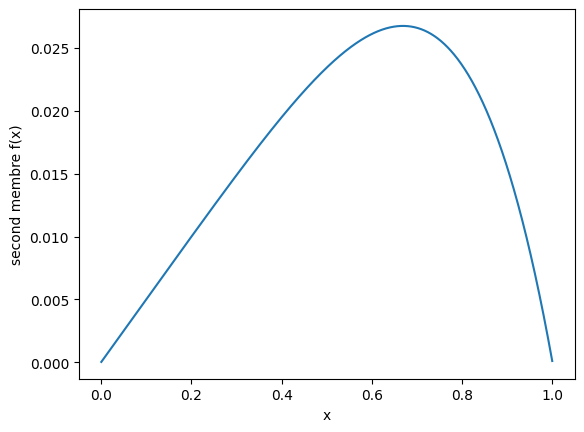

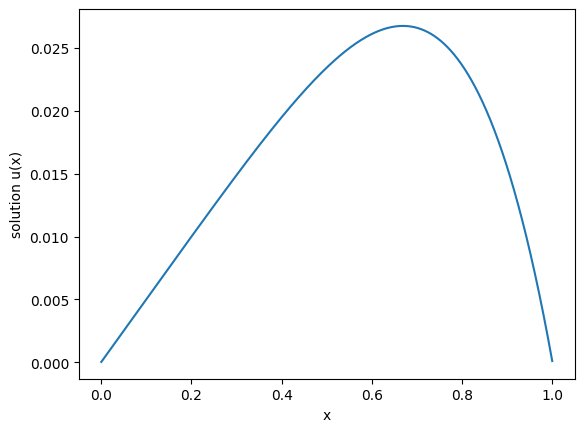

In [22]:
N = 2048

h = 1/(N + 1)

x = h*np.arange(1, N + 1, dtype=np.double)
f = second_membre_1D(N)

Uy = lin.solve(L, f)
y = lin.solve(U, Uy)

plt.figure()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("second membre f(x)")
plt.show()

sol = (x - x**5)/20

plt.figure()
plt.plot(x,sol)
plt.xlabel("x")
plt.ylabel("solution u(x)")
plt.show()

### Question 2 : Stockage tridiagonal 
    
1) Supposons $L$ et $U$ tridiagonales et respectivement triangulaire inférieure et supérieure de la forme
  
$$ L = \left( \begin{array}{cccccc}
    1       & 0     & \dots  & \dots    & 0 \\
    \gamma_1& 1     & \ddots &          & \vdots  \\
    0       & \ddots& \ddots &\ddots    & \vdots \\
    \vdots  & \ddots& \ddots &\ddots    & 0\\
    0       & \dots &  0     & \gamma_{N-1} & 1
  \end{array}\right), \qquad{}
  U = \left( \begin{array}{cccccc}
    \alpha_1&\beta_2 &       0 & \dots  & 0 \\
    0       &\alpha_2& \beta_3 &\ddots & \vdots  \\
    \vdots  & \ddots& \ddots &\ddots    & 0\\
    \vdots &       & \ddots &\ddots    & \beta_{N}\\
    0       & \dots & \dots  & 0 & \alpha_N
  \end{array}\right).$$
  
   Calculer les coefficients de la matrice produit $LU$ et en déduire la décomposition $LU$ d'une matrice tridiagonale $C$. 
  
2) Combien d'opérations sont nécessaires pour calculer les coefficients de cette décomposition? Combien de coefficients sont stockés? 

3) De quel coefficients des matrices $C$, $L$ et $U$ a-t'on besoin pour calculer les $i$-emes coefficients $\alpha_i$, $\beta_i$ et $\gamma_i$ des matrices $L$ et $U$? Proposer un ordre dans lequel faire les calculs pour que chaque coefficient $\alpha_i$, $\beta_i$ et $\gamma_i$ ne dépendent que de coefficients connus, c'est-à-dire uniquement de la matrice $C$ et de coefficients de $L$ et $U$ déjà calculés.

4) **<font color=black><span style="background-color:deepskyblue"> Bonus :</span></font>** Implémenter une fonction qui renvoie la discrétisation de $-\Delta$ décrite en (4) en utilisant un stockage sous forme tridiagonale ou bande
 pour un $N$ donné, c'est à dire de la forme
 
$$\tilde{C} = \left( \begin{array}{c|c|c|c|c} 0 & b_{2} & \dots & b_{N-1} & b_{N}\\ \hline  a_{1} & a_{2} & \dots & a_{N-1} & a_{N} \\ \hline c_{1} & c_{2} & \dots & c_{N-1} & 0 \end{array} \right) = \left( \begin{array}{l} b \\ a \\ c \end{array}\right) \in \mathbb{R}^{3,N},$$
 
tel qu'on ne stocke que les composantes non-triviales de $C$.  Afficher le résultat obtenu pour $N=3$.

In [23]:
def moins_Laplacien_1D_tridiag(N):
    """
    crée la matrice 3xN correspondant à la discrétisation de -\Delta en 1D, en format tridiagonal
    ----------   
    parametre:
    N   : taille de la matrice
    
    valeur de retour:
    matrice de taille 3xN
    """
    h = 1/(N + 1)

    a = 2/h**2
    b = -1/h**2
    c = -1/h**2

    C_tilde = np.zeros((3, N))
    C_tilde[0, 1:] = b
    C_tilde[1, :] = a
    C_tilde[2, :-1] = c
    return C_tilde

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ericg\AppData\Local\Temp\ipykernel_30592\97628294.py:2: SyntaxWarning: invalid escape sequence '\D'
  """


In [24]:
# Test avec N=3
N = 3

print(f"Laplacien au format bande :\n{moins_Laplacien_1D_tridiag(N)}")

Laplacien au format bande :
[[  0. -16. -16.]
 [ 32.  32.  32.]
 [-16. -16.   0.]]


5) **<font color=black><span style="background-color:deepskyblue"> Bonus :</span></font>** Résoudre le système $Cu = f$ avec les valeurs numériques (4) en utilisant la fonction *solve_banded* (https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_banded.html) de *scipy.linalg* qui résoud un système au format bande. 

Comparer la précision des résultats et les temps d'execution (en utilisant *%timeit*, un exemple vous est donné dans la cellule suivante) avec ceux obtenus avec la matrice pleine à la question 1. Commenter les avantages de ce stockage. 

In [25]:
N = 2**6
A = np.array([[i**j for j in range(N)] for i in range(N)],dtype=float) + N * np.eye(N)
b = np.ones(N)

%timeit lin.solve(A,b)

48 μs ± 1.25 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Solution with the full matrix:
285 ms ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Solution with banded matrix:
77.8 μs ± 1.16 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


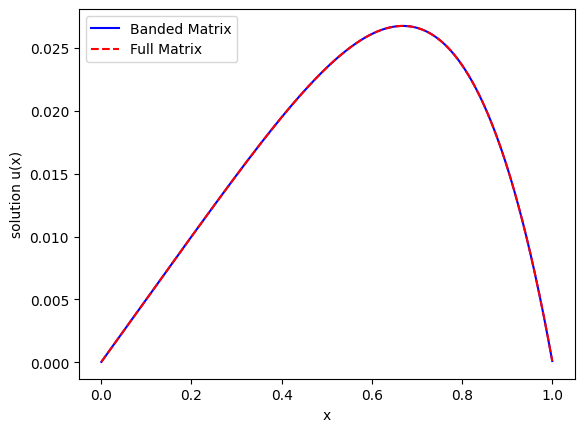

In [27]:
N = 2048

C = moins_Laplacien_1D_plein(N)
C_tilde = moins_Laplacien_1D_tridiag(N)

f = second_membre_1D(N)

print("Solution with the full matrix:")
%timeit y = lin.solve(C, f)

print()
print("Solution with banded matrix:")
%timeit sol = solve_banded((1, 1), C_tilde, f)

plt.figure()
plt.plot(x, sol, '-b', label='Banded Matrix')
plt.plot(x, y, '--r', label='Full Matrix')
plt.xlabel("x")
plt.ylabel("solution u(x)")
plt.legend()
plt.show()

**Réponse :**

6) **<font color=black><span style="background-color:deepskyblue"> Bonus :</span></font>** On va maintenant implémenter l'algorithme de décomposition LU basé sur un stockage tridiagonal de la matrice, c'est-à-dire qu'on ne stocke que les composantes non-triviales des matrices $C$, $L$ et $U$. On écrira pour cela

$$\tilde{L} = \left( \gamma_{1}, \gamma_{2}, \dots, \gamma_{N-1}, 0 \right) \in\mathbb{R}^{1,N}, \qquad{}
      \tilde{U} = \left( \begin{array}{c|c|c|c|c} 0 & \beta_2 &  \dots & \beta_{N-1}& \beta_{N} \\ \hline \alpha_{1} & \alpha_{2} & \dots & \alpha_{N-1} & \alpha_{N} \end{array} \right) \in\mathbb{R}^{2,N}. \qquad{} (5)$$
      
Tester votre algorithme sur la matrice 
  
$$C = \left(\begin{array}{ccc} 2 & 1 & 0 \\ -1 & 3 & 1 \\ 0 & 1 & 4 \end{array}\right). \qquad{}(6) $$

*Afin de valider le résultat, on pourra rentransformer les matrices $\tilde{L}$ et $\tilde{U}$ obtenues en matrices pleines, et vérifier que leur produit redonne bien C.*

In [29]:
def tridiag_factorize_lu(C):
    """"
    calcule la factorisation LU d'une matrice stockée en format tridiagonal
    ----------   
    parametres:
    C   : matrice de taille 3xN, correspondant au stockage tridiagonal d'une matrice NxN
    
    valeur de retour:
    les matrices L et U, de taille 1xN et 2xN respectivement
    """
    N = C.shape[0]
    L = np.zeros(N)
    U = np.zeros((2, N))

    U[0, 1:] = np.diag(C, k=1)

    U[1, 0] = C[0, 0] # alpha1
    for i in range(1, N):
        L[i - 1] = C[i, i - 1]/U[1, i - 1] # gamma i
        U[1, i] = C[i, i] - U[0, i]*L[i - 1] # alpha i+1


    return L, U

In [39]:
C = np.array(
    [[2, 1, 0],
    [-1, 3, 1],
    [0, 1, 4]], dtype=np.double
)

L_tilde, U_tilde = tridiag_factorize_lu(C)

LU, P = lu_factor(C)
 
print(f"L calculé :\n {L_tilde} ")
print(f"U calculé :\n {U_tilde} \n")
print(f"comparaison : LU scipy :\n {LU}\n")

L calculé :
 [-0.5         0.28571429  0.        ] 
U calculé :
 [[0.         1.         1.        ]
 [2.         3.5        3.71428571]] 

comparaison : LU scipy :
 [[ 2.          1.          0.        ]
 [-0.5         3.5         1.        ]
 [ 0.          0.28571429  3.71428571]]



7) **<font color=black><span style="background-color:deepskyblue"> Bonus :</span></font>** Adapter et implémenter les algorithmes de remontée et de descente adaptés aux matrices triangulaires stockées sous forme (5). Tester votre algorithme pour la résolution de $C u = f$ avec $C$ donnée en (6) et $f = (1,\ 1,\ 1)^T$, en utilisant la décomposition $LU$ de $C$ obtenue à la question précédente.

In [58]:
def descente(L, b):
    """
    résout le système linéaire Ly=b, L provenant de la factorisation LU d'une matrice au format tridiagonal
    ----------   
    parametre:
    L   : matrice de taille 1xN
    b   : vecteur de taille N
    
    valeur de retour:
    y   : vecteur de taille N
    """
    y = b.copy()
    for i in range(1, y.size):
        y[i] -= L[i - 1]*y[i - 1]
    return y


def remontee(U, y):
    """
    résout le système linéaire Ux=y, U provenant de la factorisation LU d'une matrice au format tridiagonal
    ----------   
    parametre:
    U   : matrice de taille 2xN
    y   : vecteur de taille N
    
    valeur de retour:
    x   : vecteur de taille N
    """
    x = np.zeros_like(y)
    x[-1] = y[-1]/U[1, -1]

    for i in range(x.size - 2, -1, -1):
        x[i] = (y[i] - U[0, i + 1]*x[i + 1])/U[1, i]
    return x

In [60]:
b    = np.ones(3)
C = np.array(
    [[2, 1, 0],
    [-1, 3, 1],
    [0, 1, 4]], dtype=np.double
)

N = C.shape[0]

L_tilde, U_tilde = tridiag_factorize_lu(C)
y_L = descente(L_tilde, b)

L = np.eye(N)
L[range(1, N), range(0, N - 1)] = L_tilde[:-1]

print(f"solution de L y = b:\n{y_L}\n")
print(f"produit L y:\n{L@y_L}\n")
print(f"RHS:\n{b}\n")

x_U = remontee(U_tilde, y_L)

U = np.zeros_like(C)
np.fill_diagonal(U, U_tilde[1,:])
U[range(0, N - 1), range(1, N)] = U_tilde[0,1:]


print(f"solution U x = y:\n{x_U}\n")
print(f"produit U x:\n{U@x_U}\n")
print(f"RHS:\n{y_L}\n")

solution de L y = b:
[1.         1.5        0.57142857]

produit L y:
[1. 1. 1.]

RHS:
[1. 1. 1.]

solution U x = y:
[0.30769231 0.38461538 0.15384615]

produit U x:
[1.         1.5        0.57142857]

RHS:
[1.         1.5        0.57142857]



**<big>Cas 2D :</big>**

>On considère maintenant une matrice bande, i.e. dont les seuls coefficients $C_{i,j}$ éventuellement non-nuls sont ceux tels que $|i-j| \le K$, où $K>0$ est appelée la largeur de bande.
>
>On utilisera pour les applications numériques la matrice $C \in \mathbb{R}^{N^2\times N^2}$ définie par
>
>$$
    C = \left( \begin{array}{c|c|c|c|c}
      D    & -I/h^2    &0 &\dots   & 0 \\ \hline
      -I/h^2    & D    & \ddots&  \ddots &\vdots  \\ \hline
      0    &  \ddots   & \ddots & \ddots& 0  \\ \hline
      \vdots   & \ddots &\ddots & \ddots &-I/h^2\\ \hline
      0      & \dots & 0 &   -I/h^2  & D
    \end{array}\right), \quad{}
    D = \left( \begin{array}{ccccc}
      4/h^2    & -1/h^2  & 0  & \dots   & 0 \\
      -1/h^2    & 4/h^2    & \ddots& \ddots& \vdots  \\   
      0      & \ddots & \ddots & \ddots  & 0\\
      \vdots & \ddots & \ddots  & \ddots & -1/h^2\\
      0      & \dots  & 0 & -1/h^2  & 4/h^2
    \end{array}\right) \in\mathbb{R}^{N\times N},
    \qquad{} (7)
$$
>
>où $I$ est la matrice identité de taille $N$ et $h = \frac{1}{N+1}$. Cette matrice correspond à une discrétisation de l'opérateur $-\Delta$ en 2D. Pour les applications, on prendra $N=64$.

### Question 3 : Matrices pleines 

$1$. **<font color=black><span style="background-color:deepskyblue"> Bonus :</span></font>** Implémenter une fonction qui renvoie la discrétisation de $-\Delta$ en dimension 2 décrite en (7), pour un $N$ donné. Afficher le résultat obtenu pour $N=3$. 

In [68]:
def moins_Laplacien_2D_plein(N):
    """
    crée la matrice N^2xN^2 correspondant à la discrétisation de -\Delta en 2D
    ----------   
    parametre:
    N   : taille de la matrice
    
    valeur de retour:
    matrice de taille N^2xN^2
    """
    h = 1/(N + 1)

    D = np.zeros((N, N))
    np.fill_diagonal(D, 4/h**2)
    D[range(0, N - 1), range(1, N)] = (-1/h**2)
    D[range(1, N), range(0, N - 1)] = (-1/h**2)

    C = np.zeros((N**2, N**2))
    for i in range(0, N**2, N):
        C[i:i+N, i:i+N] = D
    
    C[range(N, N**2), range(0,N*(N-1))] = (-1/h**2)
    C[range(0,N*(N-1)), range(N, N**2)] = (-1/h**2)
    
    
    return C


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ericg\AppData\Local\Temp\ipykernel_30592\4214089105.py:2: SyntaxWarning: invalid escape sequence '\D'
  """


In [69]:
N = 3

C = moins_Laplacien_2D_plein(N)

print(f"Laplacien 2D :\n{C}")

Laplacien 2D :
[[ 64. -16.   0. -16.   0.   0.   0.   0.   0.]
 [-16.  64. -16.   0. -16.   0.   0.   0.   0.]
 [  0. -16.  64.   0.   0. -16.   0.   0.   0.]
 [-16.   0.   0.  64. -16.   0. -16.   0.   0.]
 [  0. -16.   0. -16.  64. -16.   0. -16.   0.]
 [  0.   0. -16.   0. -16.  64.   0.   0. -16.]
 [  0.   0.   0. -16.   0.   0.  64. -16.   0.]
 [  0.   0.   0.   0. -16.   0. -16.  64. -16.]
 [  0.   0.   0.   0.   0. -16.   0. -16.  64.]]


$2$. **<font color=black><span style="background-color:deepskyblue"> Bonus :</span></font>** 
- En utilisant la fonction *solve* de *numpy.linalg*, résoudre le système $Cu = f$ avec $f_{(i-1)N+j} = f(x_i,y_j) = 5\pi^2 \sin(\pi x_i)\sin(2\pi y_j)$ où $x_i = ih$ et $y_j = jh$ pour $i,j=1,\dots,N$. 
- Vérifier que $u(x,y) = \sin(\pi x)\sin(2\pi y)$ est solution du problème (3).
- Tracer les fonctions $u$ théorique et numérique avec la fonction *contourf*.
- Calculer l'erreur avec le vecteur obtenu. 
- Commenter la taille de la matrice $A$ stockée (**sauvegarder avant d'executer**). 

In [82]:
def second_membre_2D(N):
    """
    crée le second membre de taille N^2 en 2D, donne par f_i = f(x_i)
    les coposantes sont stockées sous la forme 
    f(x_0,y_0), ..., f(x_{N-1},y_0), f(x_0, y_1), ..., f(x_{N-1},y_1)...
    ----------   
    parametre:
    N   : taille du vecteur 
    
    valeur de retour:
    vecteur de taille N^2
    """
    h = 1/(N+1)
    x = h*np.arange(1, N+1)

    f = np.ones((N, N))
    f = (5*np.pi**2)*(f*np.sin(np.pi*x[:, None]))*np.sin(2*np.pi*x)
    
    return f.flatten()

In [83]:
N = 3

f = second_membre_2D(N)

print(f"2nd membre :\n{f}")

2nd membre :
[ 3.48943210e+01  4.27332185e-15 -3.48943210e+01  4.93480220e+01
  6.04338972e-15 -4.93480220e+01  3.48943210e+01  4.27332185e-15
 -3.48943210e+01]


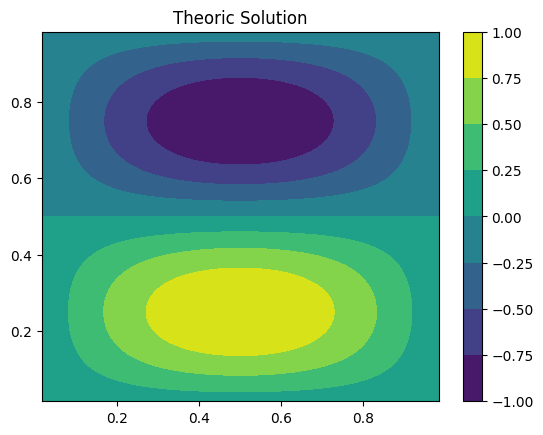

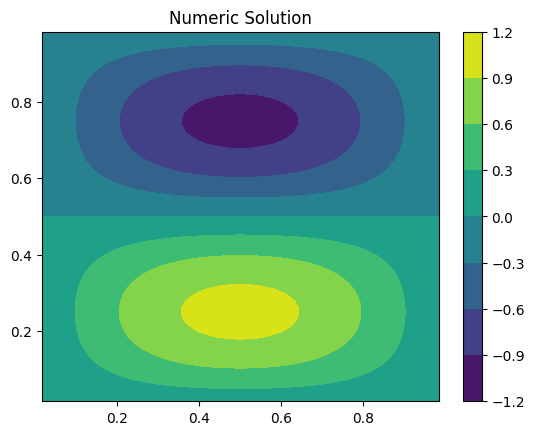

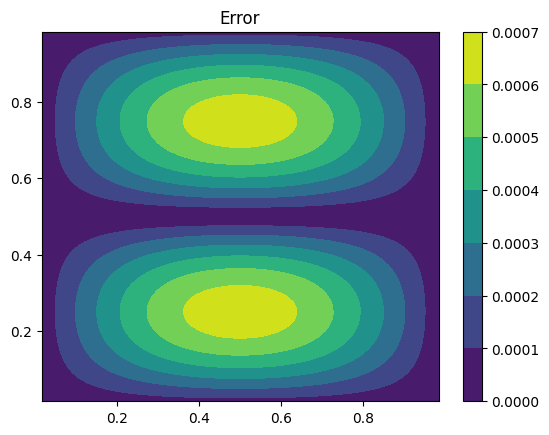

In [90]:
N          = 64

C = moins_Laplacien_2D_plein(N)
f = second_membre_2D(N)
u = lin.solve(C, f)

nx     = N
ny     = N
dx     = 1./(nx+1)
dy     = 1./(ny+1)
x      = np.linspace(1,nx,nx)*dx
y      = np.linspace(1,ny,ny)*dy
xx, yy = np.meshgrid(x, y, indexing='xy')

u_theory = np.sin(np.pi*xx)*np.sin(2*np.pi*yy)

plt.figure()
plt.title("Theoric Solution")
plt.contourf(xx,yy, u_theory)
plt.colorbar()
plt.show()

plt.figure()
plt.title("Numeric Solution")
plt.contourf(xx,yy, u.reshape((N, N), order='F'))
plt.colorbar()
plt.show()

plt.figure()
plt.title("Error")
plt.contourf(xx,yy, np.abs(u_theory - u.reshape((N, N), order='F')))
plt.colorbar()
plt.show()


**Réponse :**

$u(x,y) = \sin(\pi x)\sin(2\pi y)$

\begin{cases}
u(0, y) = \sin(0)\sin(2\pi y) = 0 \\
u(1, y) = \sin(\pi)\sin(2\pi y) = 0 \\
u(x, 0) = \sin(\pi x)\sin(0) = 0 \\
u(x, 1) = \sin(\pi x)\sin(2\pi) = 0 
\end{cases}

$\frac{\partial^2 u}{\partial x^2} = -\pi^2\sin(\pi x)\sin(2\pi y)$ et $\frac{\partial^2 u}{\partial y^2} = -4\pi^2\sin(\pi x)\sin(2\pi y)$

$$\therefore -\Delta u(x,y) = -\frac{\partial^2 u}{\partial x^2} - \frac{\partial^2 u}{\partial y^2} = 5\pi^2 \sin(\pi x)\sin(2\pi y)$$

On vérifie alors que $u$ est solution de (3).

La matrice stockée a $(N^2)\cdot(N^2) = N^4 = 2^24 = 16\,777\,216$ élements.

Chaque élement est un double, alors consome $8$ bytes. Alors, la matrice consume au moins 128 MB.

### Question 4 : Matrices bandes

On stocke désormais la matrice sous forme bande, c'est-à-dire qu'on écrit 

$$\tilde{C} = \left(
      \begin{array}{c|c|c|c|c|c}
        0             & \dots & 0        & C_{1,K+1} & \dots   & C_{N-K,N}\\
        \hline \vdots & \ddots & \ddots & C_{2,K+1} &\dots   & C_{N-K+1,N}\\
        \hline 0      & C_{1,2} &          &          &         & \vdots    \\
        \hline C_{1,1} & C_{2,2} & \dots  & \dots     & \dots   & C_{N,N} \\
        \hline C_{2,1} & C_{3,2} & \dots   & \dots    & C_{N,N-1} & 0 \\
        \hline \vdots &        &         &          &         & \vdots \\
        \hline C_{K+1,1} & \dots & C_{N,N-K} & 0       & \dots   &  0
      \end{array} \right) \in \mathbb{R}^{2K+1,N}.$$
      
Utiliser la fonction *solve\_banded* de *scipy* exploitant cette structure bande pour résoudre le problème $Au = f$. Comparer la vitesse d'execution (avec %timeit) et la taille de la matrice utilisée avec la question précédente.

In [ ]:
def moins_Laplacien_2D_bande(N):
    """
    crée la matrice correspondant à la discrétisation de -\Delta en 2D sous format bande
    ----------   
    parametre:
    N   : taille de la matrice
    
    valeur de retour:
    matrice de taille N^2xN^2 sous format bande
    """ 
  
    return 

In [ ]:
N               = 64




nx     = N
ny     = N
dx     = 1./(nx+1)
dy     = 1./(ny+1)
x      = np.linspace(1,nx,nx)*dx
y      = np.linspace(1,ny,ny)*dy
xx, yy = np.meshgrid(x, y, indexing='xy')

plt.figure()
plt.contourf(xx,yy, )
plt.colorbar()
plt.show()

plt.figure()
plt.contourf(xx,yy, )
plt.colorbar()
plt.show()